<a href="https://colab.research.google.com/github/EMStarTech/EM_StarTech/blob/main/Rigel_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

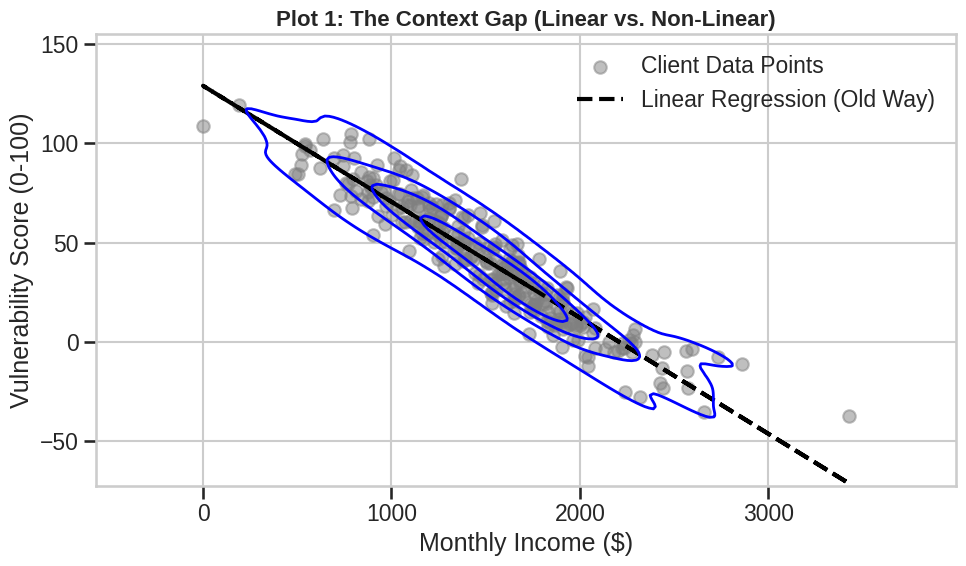

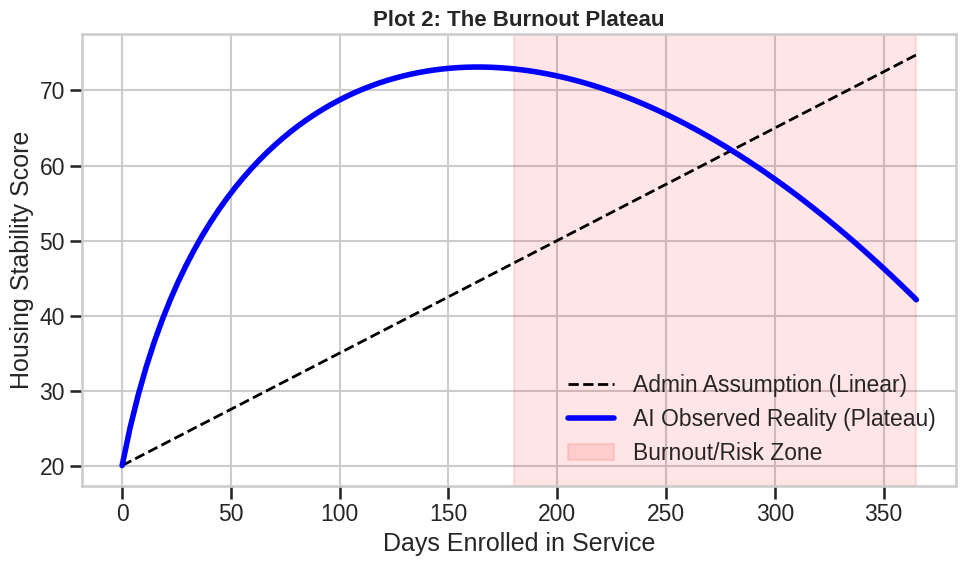

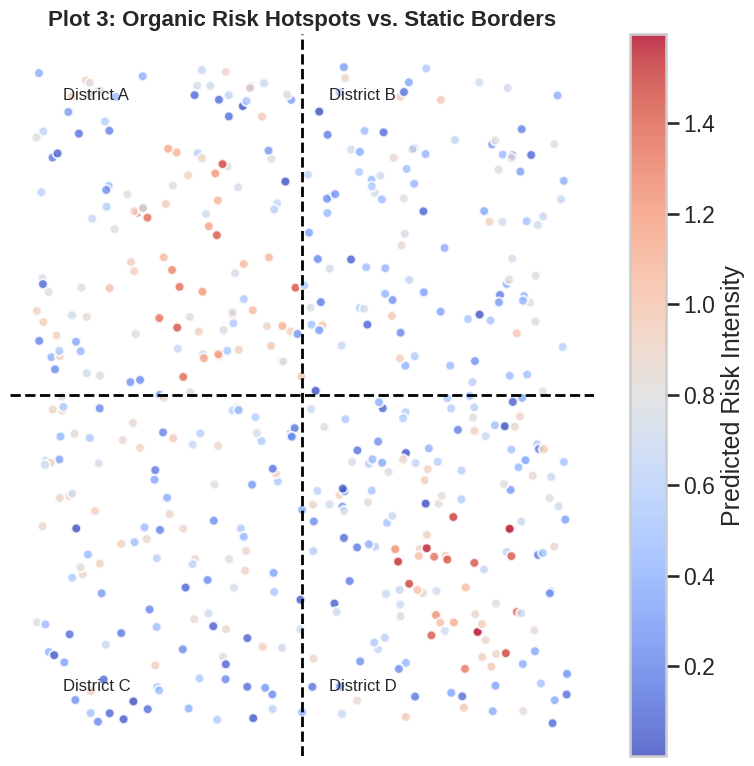

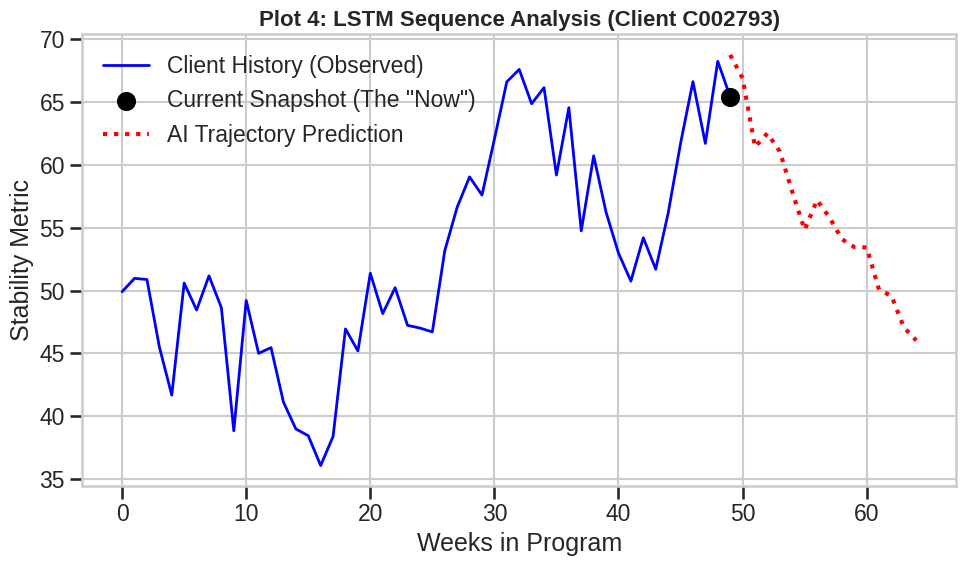

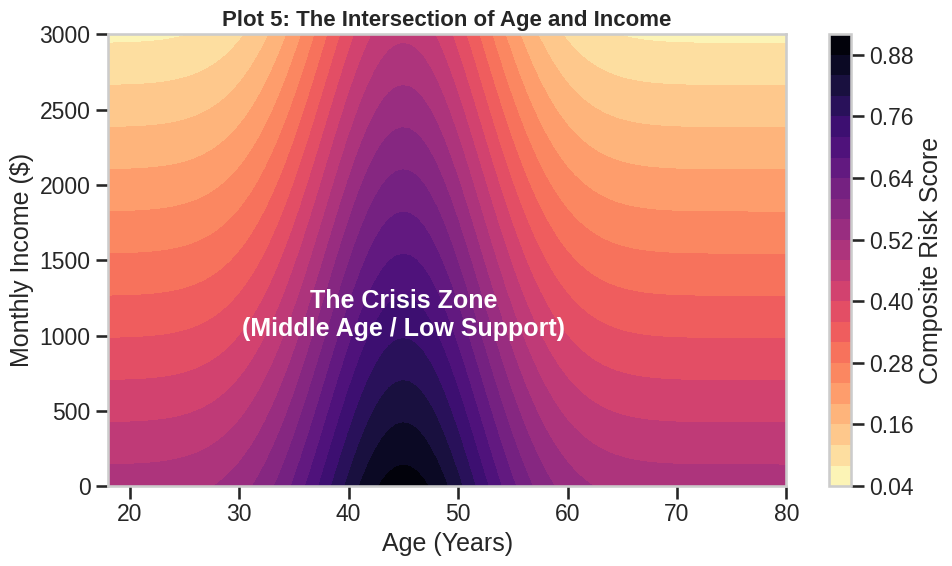

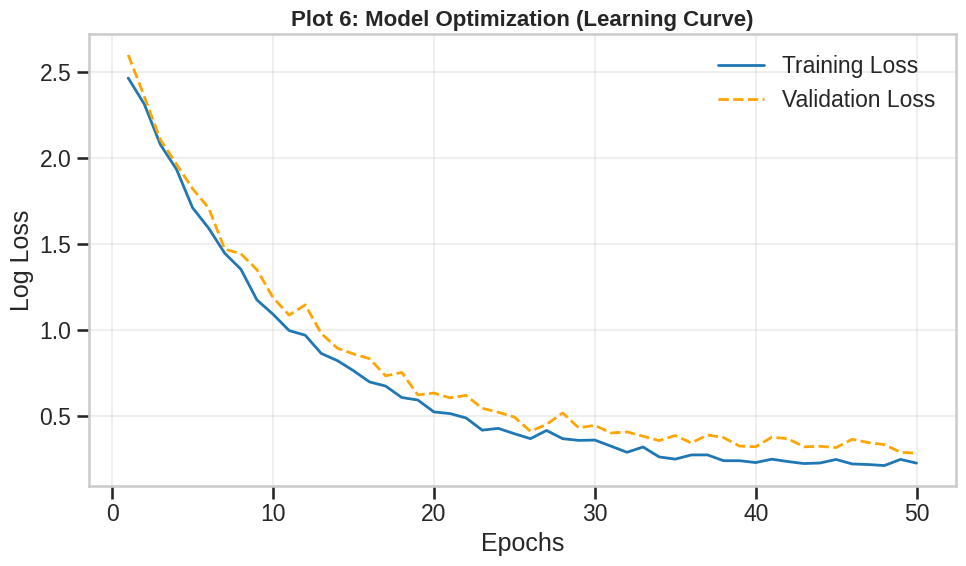

In [1]:
# PROJECT RIGEL: DATA VISUALIZATION DEMO
# --------------------------------------
# NOTE: All data generated in this notebook is SYNTHETIC and randomly generated
# for demonstration purposes only. It simulates the structure of HMIS data
# but contains no real PII (Personally Identifiable Information).

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

# Set Style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_context("talk")

# ==========================================
# PLOT 1: THE CONTEXT GAP (Income vs. Score)
# ==========================================
def plot_context_gap():
    np.random.seed(42)
    n_samples = 300

    # Generate Synthetic Data
    income = np.random.normal(1500, 500, n_samples)
    income = np.maximum(income, 0)

    # Non-linear risk relationship (High risk at very low AND mid-tier income without support)
    risk_score = 100 - (income * 0.04) + np.random.normal(0, 10, n_samples)
    risk_score += (np.sin(income / 500) * 15) # Add non-linearity

    plt.figure(figsize=(10, 6))

    # Plot Points
    plt.scatter(income, risk_score, alpha=0.5, color='gray', label='Client Data Points')

    # Linear Regression Line (The "Old Way")
    m, b = np.polyfit(income, risk_score, 1)
    plt.plot(income, m*income + b, color='black', linestyle='--', linewidth=3, label='Linear Regression (Old Way)')

    # Deep Learning Contour (The "New Way")
    sns.kdeplot(x=income, y=risk_score, levels=5, color='blue', linewidths=2, label='Deep Learning Risk Contour')

    plt.title("Plot 1: The Context Gap (Linear vs. Non-Linear)", fontsize=16, fontweight='bold')
    plt.xlabel("Monthly Income ($)")
    plt.ylabel("Vulnerability Score (0-100)")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==========================================
# PLOT 2: THE BURNOUT CURVE (Time vs. Stability)
# ==========================================
def plot_burnout_curve():
    days = np.linspace(0, 365, 100)

    # Linear Assumption (More time = Better)
    linear_improvement = 20 + (days * 0.15)

    # Deep Learning Reality (Plateau Effect)
    # Logarithmic growth that levels off and dips
    dl_reality = 20 + (30 * np.log1p(days / 20)) - (0.0005 * days**2)

    plt.figure(figsize=(10, 6))
    plt.plot(days, linear_improvement, 'k--', linewidth=2, label='Admin Assumption (Linear)')
    plt.plot(days, dl_reality, 'b-', linewidth=4, label='AI Observed Reality (Plateau)')

    # Highlight the Plateau
    plt.axvspan(180, 365, color='red', alpha=0.1, label='Burnout/Risk Zone')

    plt.title("Plot 2: The Burnout Plateau", fontsize=16, fontweight='bold')
    plt.xlabel("Days Enrolled in Service")
    plt.ylabel("Housing Stability Score")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==========================================
# PLOT 3: SPATIAL RISK MAP (Organic Hotspots)
# ==========================================
def plot_spatial_risk():
    np.random.seed(101)

    # Generate random "City" coordinates
    x = np.random.rand(500) * 100
    y = np.random.rand(500) * 100

    # Create artificial clusters (Hotspots)
    mask1 = (x - 30)**2 + (y - 70)**2 < 400 # Cluster 1
    mask2 = (x - 80)**2 + (y - 20)**2 < 200 # Cluster 2

    risk_level = np.random.rand(500)
    risk_level[mask1] += 0.5 # Increase risk in cluster 1
    risk_level[mask2] += 0.6 # Increase risk in cluster 2

    plt.figure(figsize=(8, 8))

    # Draw "District Boundaries" (The Old Way)
    plt.axvline(50, color='black', linestyle='--', linewidth=2)
    plt.axhline(50, color='black', linestyle='--', linewidth=2)
    plt.text(5, 95, "District A", fontsize=12)
    plt.text(55, 95, "District B", fontsize=12)
    plt.text(5, 5, "District C", fontsize=12)
    plt.text(55, 5, "District D", fontsize=12)

    # Plot Heatmap of Risk
    plt.scatter(x, y, c=risk_level, cmap='coolwarm', s=50, alpha=0.8, edgecolors='w')

    plt.title("Plot 3: Organic Risk Hotspots vs. Static Borders", fontsize=16, fontweight='bold')
    plt.axis('off') # Remove axes for map look
    plt.colorbar(label='Predicted Risk Intensity')
    plt.tight_layout()
    plt.show()

# ==========================================
# PLOT 4: LSTM SEQUENCE (Trajectory vs Snapshot)
# ==========================================
def plot_lstm_sequence():
    time_steps = np.arange(50)

    # Generate a volatile history
    history = 50 + np.cumsum(np.random.normal(0, 5, 50))
    # Clip to 0-100
    history = np.clip(history, 0, 100)

    # Forecast (Future)
    future_steps = np.arange(49, 65)
    future_val = history[-1] + np.cumsum(np.random.normal(-1, 2, 16)) # Downward trend

    plt.figure(figsize=(10, 6))

    # Plot History
    plt.plot(time_steps, history, color='blue', linewidth=2, label='Client History (Observed)')

    # Plot Snapshot (The single point a human sees today)
    plt.scatter(time_steps[-1], history[-1], color='black', s=150, zorder=5, label='Current Snapshot (The "Now")')

    # Plot Forecast
    plt.plot(future_steps, future_val, color='red', linestyle=':', linewidth=3, label='AI Trajectory Prediction')

    plt.title("Plot 4: LSTM Sequence Analysis (Client C002793)", fontsize=16, fontweight='bold')
    plt.xlabel("Weeks in Program")
    plt.ylabel("Stability Metric")
    plt.legend()
    plt.tight_layout()
    plt.show()

# ==========================================
# PLOT 5: AGE vs INCOME INTERSECTION
# ==========================================
def plot_demographics():
    # Create a grid for heatmap
    age = np.linspace(18, 80, 100)
    income = np.linspace(0, 3000, 100)
    X, Y = np.meshgrid(age, income)

    # Define Risk Function: High risk for youth (low income) AND Middle Age (Crisis Zone)
    # This creates the "Purple" zone in the middle
    Z = (1 - (Y/3500)) * 0.5 + np.exp(-((X-45)**2)/100) * 0.4

    plt.figure(figsize=(10, 6))
    contour = plt.contourf(X, Y, Z, cmap='magma_r', levels=20)

    plt.colorbar(contour, label='Composite Risk Score')
    plt.title("Plot 5: The Intersection of Age and Income", fontsize=16, fontweight='bold')
    plt.xlabel("Age (Years)")
    plt.ylabel("Monthly Income ($)")

    # Annotate the Crisis Zone
    plt.text(45, 1000, "The Crisis Zone\n(Middle Age / Low Support)", color='white', ha='center', fontweight='bold')

    plt.tight_layout()
    plt.show()

# ==========================================
# PLOT 6: MODEL TRAINING LOSS
# ==========================================
def plot_learning_curve():
    epochs = np.arange(1, 51)
    # Simulate Loss Curve
    train_loss = 2.5 * np.exp(-epochs/10) + 0.2 + np.random.normal(0, 0.02, 50)
    val_loss = 2.5 * np.exp(-epochs/10) + 0.3 + np.random.normal(0, 0.03, 50)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_loss, label='Training Loss', linewidth=2)
    plt.plot(epochs, val_loss, label='Validation Loss', linestyle='--', linewidth=2, color='orange')

    plt.title("Plot 6: Model Optimization (Learning Curve)", fontsize=16, fontweight='bold')
    plt.xlabel("Epochs")
    plt.ylabel("Log Loss")
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# RUN ALL PLOTS
plot_context_gap()
plot_burnout_curve()
plot_spatial_risk()
plot_lstm_sequence()
plot_demographics()
plot_learning_curve()